In [38]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [17]:
data = pd.read_csv(r"C:\Users\ma516\OneDrive\Desktop\machine learning projects\unsupervised machine learning projects\project 2 . Spotify Song classifier app\SpotifyFeatures.csv")
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [18]:
data.shape

(232725, 18)

In [19]:
data.isnull().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [20]:
data = data.drop(columns=["track_id"])

In [21]:
LE = LabelEncoder()

In [22]:
for col in data.columns:
    data[col] = LE.fit_transform(data[col])

In [23]:
data.head()

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,15,5181,18348,0,4348,697,5447,2427,0,4,1077,27022,0,303,68578,3,1507
1,15,8254,92962,1,3983,898,10581,2254,0,9,882,23350,1,646,72025,3,1509
2,15,6451,32194,3,4689,971,17197,1648,0,3,834,15035,1,140,26802,4,1061
3,15,5181,30998,0,4440,548,13176,1843,0,4,816,16732,0,173,70834,3,920
4,15,4074,90792,4,4687,639,3728,1742,4524,8,933,8139,0,234,56182,3,1083


<Figure size 500x500 with 0 Axes>

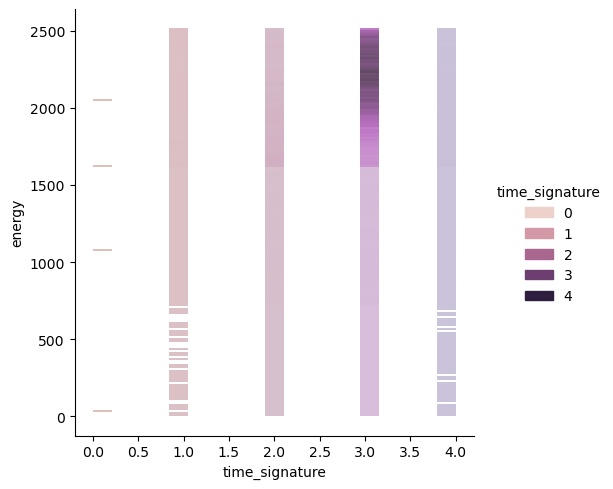

In [29]:
plt.figure(figsize=(5,5))
sns.displot(x = data["time_signature"] , y = data["energy"] ,hue = data["time_signature"])
plt.xlabel("time_signature")
plt.ylabel("energy")
plt.show()

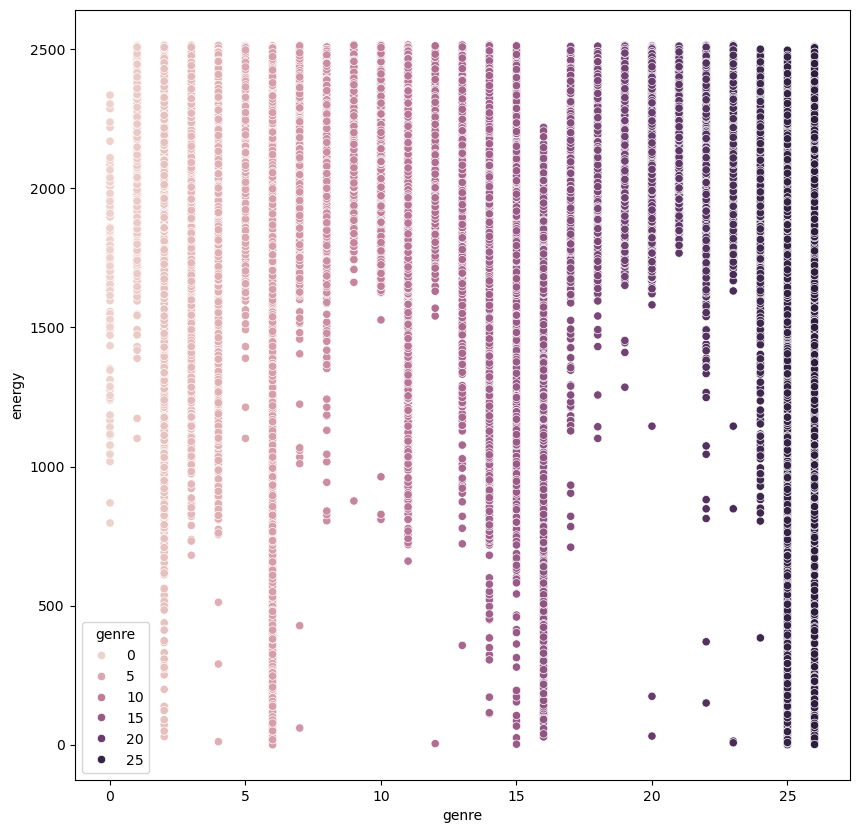

In [33]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = data["genre"] , y = data["energy"] ,hue = data["genre"])
plt.xlabel("genre")
plt.ylabel("energy")
plt.show()

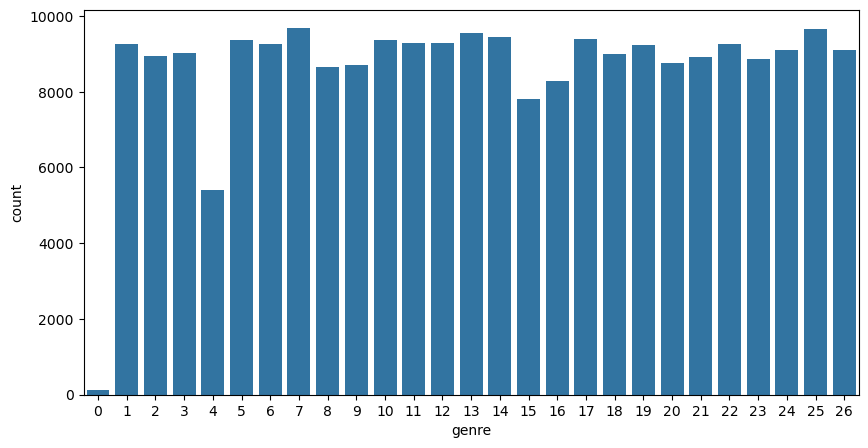

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x = data["genre"])
plt.show()

In [39]:
wcss = []
for i in range (2,21):
    km = KMeans(n_clusters=i,init='k-means++',n_init='auto',)
    km.fit(data)
    wcss.append(km.inertia_)

C:\Users\ma516\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ma516\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\ma516\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ma516\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\ma516\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

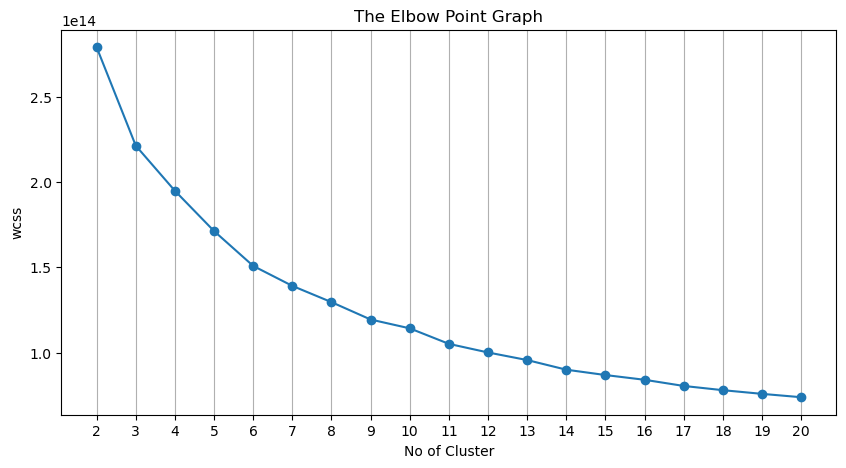

In [40]:
# plot an elbow graph
plt.figure(figsize=(10,5))
plt.plot([i for i in range(2,21)] ,wcss , marker = "o")
plt.title("The Elbow Point Graph")
plt.xlabel("No of Cluster")
plt.xticks([i for i in range(2,21)])
plt.ylabel("wcss")
plt.grid(axis = "x")
plt.show()

In [51]:
x = data.values


C:\Users\ma516\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


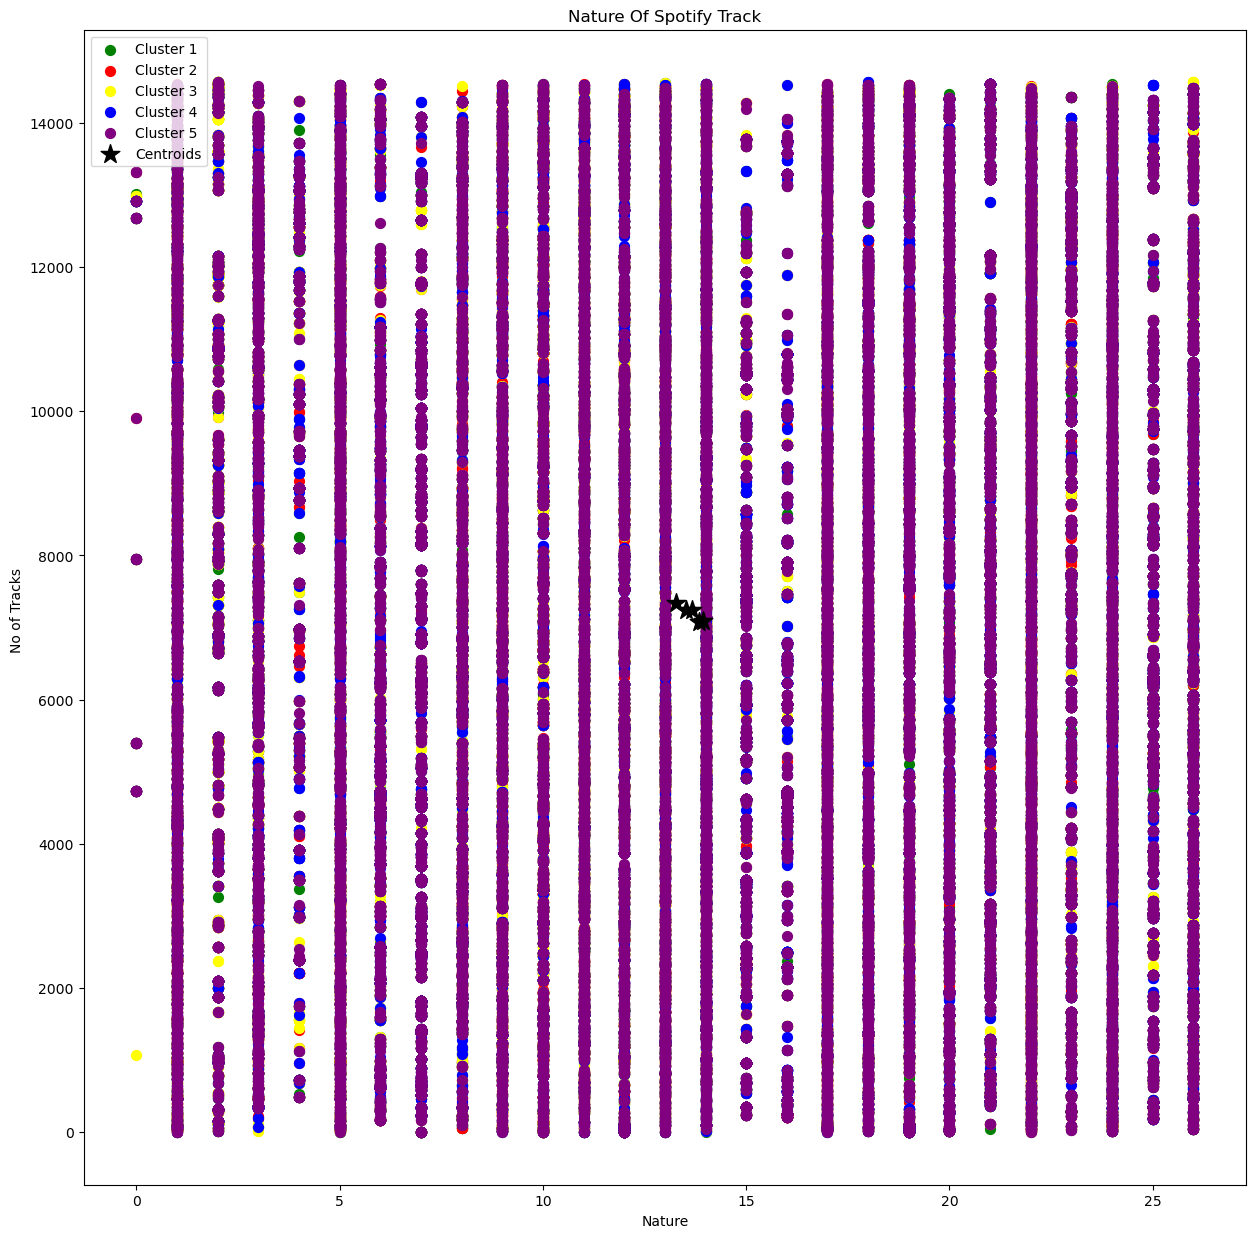

In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fit model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
Y = kmeans.fit_predict(x)

# Plot clusters
plt.figure(figsize=(15,15))
plt.scatter(x[Y==0, 0], x[Y==0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(x[Y==1, 0], x[Y==1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(x[Y==2, 0], x[Y==2, 1], s=50, c='yellow', label='Cluster 3')
plt.scatter(x[Y==3, 0], x[Y==3, 1], s=50, c='blue', label='Cluster 4')
plt.scatter(x[Y==4, 0], x[Y==4, 1], s=50, c='purple', label='Cluster 5')


# Plot centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, c='black', marker='*', label='Centroids')
plt.title('Nature Of Spotify Track')
plt.xlabel('Nature')
plt.ylabel('No of Tracks ')
plt.legend()
plt.show()